In [26]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#api request from the eia

api_key = "5WecopwolfmCM4zg4P5Bm9ZVaRYIMFEjVa9KQZaT"

#from colorado, years 2016-2021
base_url = f'https://api.eia.gov/v2/total-energy/data/?api_key={api_key}&frequency=annual&data[0]=value&facets[msn][]=RECCBUS&facets[msn][]=REEIBUS&facets[msn][]=REICBUS&facets[msn][]=REPRBUS&facets[msn][]=RERCBUS&facets[msn][]=RETCBUS&start=2016&end=2021&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'



# Send the HTTP GET request to the API and retrieve the response
response = requests.get(base_url).json()

#print results of the api request
print(json.dumps(response, indent = 4, sort_keys=True))




{
    "apiVersion": "2.1.4",
    "request": {
        "command": "/v2/total-energy/data/",
        "params": {
            "api_key": "5WecopwolfmCM4zg4P5Bm9ZVaRYIMFEjVa9KQZaT",
            "data": [
                "value"
            ],
            "end": 2021,
            "facets": {
                "msn": [
                    "RECCBUS",
                    "REEIBUS",
                    "REICBUS",
                    "REPRBUS",
                    "RERCBUS",
                    "RETCBUS"
                ]
            },
            "frequency": "annual",
            "length": 5000,
            "offset": 0,
            "sort": [
                {
                    "column": "period",
                    "direction": "desc"
                }
            ],
            "start": 2016
        }
    },
    "response": {
        "data": [
            {
                "msn": "REICBUS",
                "period": 2021,
                "seriesDescription": "Total Renewable Energy Consumed

In [28]:
#lists to store the desired values
energy_type = []
period = []
value = []
unit = []

In [29]:
#populate the lists
for item in range(len(response['response']['data'])):
    energy_type.append(response['response']['data'][item]['seriesDescription'])
    period.append(response['response']['data'][item]['period'])
    value.append(response['response']['data'][item]['value'])
    unit.append(response['response']['data'][item]['unit'])
   

In [30]:
#create dataframe from these lists
energy = {
    'Period':period,
    'Energy Type': energy_type,
    'Value':value,
    'Unit': unit
    
}

energy_df = pd.DataFrame(energy)


In [31]:
#df sorted by year
energy_df = energy_df.sort_values(by='Period', ascending=True)
energy_df = energy_df.reset_index(drop=True)
energy_df

,Period,Energy Type,Value,Unit
0,2016,Total Renewable Energy Consumption in Trillion...,10408.662,Trillion Btu
1,2016,Total Renewable Energy Consumed by the Commerc...,242.294,Trillion Btu
2,2016,Total Renewable Energy Consumed by the Electri...,5529.156,Trillion Btu
3,2016,Total Renewable Energy Consumed by the Industr...,2522.887,Trillion Btu
4,2016,Total Renewable Energy Production in Trillion Btu,10477.366,Trillion Btu
5,2016,Total Renewable Energy Consumed by the Residen...,645.714,Trillion Btu
6,2017,Total Renewable Energy Production in Trillion Btu,11259.503,Trillion Btu
7,2017,Total Renewable Energy Consumed by the Industr...,2515.302,Trillion Btu
8,2017,Total Renewable Energy Consumed by the Electri...,6231.717,Trillion Btu
9,2017,Total Renewable Energy Consumed by the Commerc...,255.180,Trillion Btu


In [32]:
#a list to show all the units we are working with: total of 21
types_of_units = energy_df['Unit'].unique()
types_of_units

array(['Trillion Btu'], dtype=object)

In [33]:
#new df sorted by the units column to group units together
units_df = energy_df.sort_values(by='Unit')
units_df.reset_index(drop=True).head(100)


,Period,Energy Type,Value,Unit
0,2016,Total Renewable Energy Consumption in Trillion...,10408.662,Trillion Btu
1,2019,Total Renewable Energy Consumed by the Residen...,836.414,Trillion Btu
2,2019,Total Renewable Energy Production in Trillion Btu,11627.479,Trillion Btu
3,2019,Total Renewable Energy Consumed by the Industr...,2458.597,Trillion Btu
4,2019,Total Renewable Energy Consumed by the Commerc...,279.296,Trillion Btu
5,2020,Total Renewable Energy Consumed by the Commerc...,291.842,Trillion Btu
6,2020,Total Renewable Energy Consumed by the Residen...,766.542,Trillion Btu
7,2019,Total Renewable Energy Consumption in Trillion...,11468.477,Trillion Btu
8,2020,Total Renewable Energy Consumption in Trillion...,11518.775,Trillion Btu
9,2020,Total Renewable Energy Consumed by the Electri...,6785.090,Trillion Btu


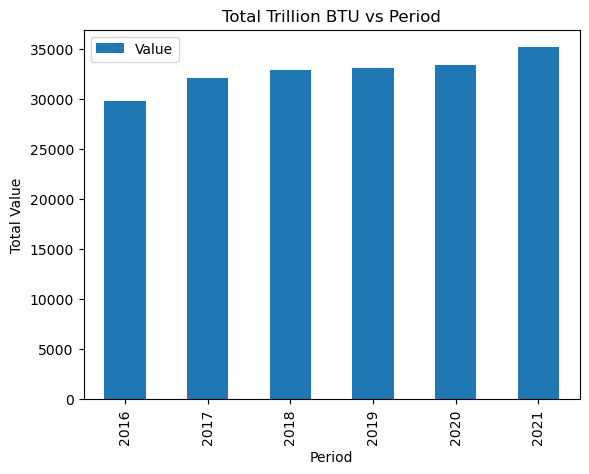

In [36]:
#create a bar graph of the total amount of 'Trillion Btu' used each year

#sort df by year 
units_df = energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

#get the sum per year
barrels_df = units_df[units_df['Unit'] == 'Trillion Btu'].groupby('Period')['Value'].sum().reset_index()
barrels_df.plot(x='Period', y='Value', kind='bar')

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Trillion BTU vs Period')

plt.show()

In [35]:
energy_df.to_csv('total_renewable_energy.csv', index=False)